## Модель классификации

In [16]:
# импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Этап 1. Загрузка данных из модуля datasets библиотеки Scikit-learn

In [17]:
# импортируем данные и поместим их в переменную cancer
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [22]:
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
# посмотрим на составляющие датасета

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [23]:
# можно и так
for k in cancer.keys():
  print(k)

data
target
frame
target_names
DESCR
feature_names
filename
data_module


In [24]:
# посмотрим на тип данных компонентов data и target
print(type(cancer.data), type(cancer.target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [13]:
# выведем целевые классы
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [20]:
# выведем описание
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [28]:
# cоздадим датафрейм
# названия столбцов возьмем из cancer.feature_names
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

# добавим целевую переменную
cancer_df['target'] = cancer.target

# посмотрим на первые пять наблюдений
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [29]:
# расшифруем 0 и 1 в значениях целевой переменной
# для этого посчитаем сколько раз встречается 0 и сколько раз встречается 1
unique, counts = np.unique(cancer.target, return_counts = True)
unique, counts

(array([0, 1]), array([212, 357]))

In [27]:
# посмотрим на тип переменных, используя метод .info()
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [30]:
# для этого воспользуемся методом .describe() и округлим значения
cancer_df.describe().round(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,...,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,0.63
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,...,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,0.48
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,...,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,0.00
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,...,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,0.00
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,...,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,1.00
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,...,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,1.00
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,...,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,1.00


### Этап 2. Предварительная обработка данных

Пропущенные значения

In [31]:
# воспользуемся функциями isnull() и sum()
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Нормализация данных

In [32]:
# приведем все независимые переменные к единому масштабу

# снова создадим датафрейм без целевой переменной
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

# импортируем необходимый класс из модуля preprocessing библиотеки sklearn
from sklearn.preprocessing import StandardScaler

# создадим объект этого класса
scaler = StandardScaler()

# приведем данные к единому масштабу
scaled_data = scaler.fit_transform(cancer_df)

# на выходе получается массив Numpy
type(scaled_data)

numpy.ndarray

In [33]:
# преобразуем scaled_data обратно в датафрейм
cancer_df_scaled = pd.DataFrame(scaled_data, columns = cancer.feature_names)

# вновь добавим целевую переменную
cancer_df_scaled['target'] = cancer.target

# посмотрим на результат (только два первых значения)
cancer_df_scaled.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0


In [ ]:
# а также на основные статистическое показатели (масштаб должен быть другим!)
cancer_df_scaled.describe().round(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,...,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.63
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.48
min,-2.03,-2.23,-1.98,-1.45,-3.11,-1.61,-1.11,-1.26,-2.74,-1.82,...,-2.22,-1.69,-1.22,-2.68,-1.44,-1.31,-1.75,-2.16,-1.60,0.00
25%,-0.69,-0.73,-0.69,-0.67,-0.71,-0.75,-0.74,-0.74,-0.70,-0.72,...,-0.75,-0.69,-0.64,-0.69,-0.68,-0.76,-0.76,-0.64,-0.69,0.00
50%,-0.22,-0.10,-0.24,-0.30,-0.03,-0.22,-0.34,-0.40,-0.07,-0.18,...,-0.04,-0.29,-0.34,-0.05,-0.27,-0.22,-0.22,-0.13,-0.22,1.00
75%,0.47,0.58,0.50,0.36,0.64,0.49,0.53,0.65,0.53,0.47,...,0.66,0.54,0.36,0.60,0.54,0.53,0.71,0.45,0.45,1.00
max,3.97,4.65,3.98,5.25,4.77,4.57,4.24,3.93,4.48,4.91,...,3.89,4.29,5.93,3.96,5.11,4.70,2.69,6.05,6.85,1.00


### Этап 3. Исследовательский анализ данных

Найдем признаки с наибольшими отличиями в зависимости от значения целевой переменной

In [34]:
# сгруппируем данные по целевой переменной, рассчитаем среднее и перевернем (транспонируем) наш датафрейм
# все это последовательно делается с помощью group_by, mean() и .T
data = cancer_df_scaled.groupby('target').mean().T

# выведем первые два значения, чтобы убедиться в верности результата
data.head(2)

target,0,1
mean radius,0.947340,-0.562566
mean texture,0.538776,-0.319945


In [ ]:
# вычтем одну колонку из другой и вычислим модуль
# синтаксис может показаться сложным, пока не обращайте на это внимания
data['diff'] = abs(data.iloc[:, 0] - data.iloc[:, 1])

# остается отсортировать наш датафрейм по столбцу разницы средних в нисходящем порядке
data = data.sort_values(by = ['diff'], ascending = False)

# и вывести те значения (пусть их будет 10), где разница наиболее существенная
data.head(10)

target,0,1,diff
worst concave points,1.029791,-0.611529,1.641320
worst perimeter,1.015969,-0.603320,1.619289
mean concave points,1.007793,-0.598465,1.606258
worst radius,1.007585,-0.598342,1.605927
mean perimeter,0.963700,-0.572281,1.535981
worst area,0.952267,-0.565492,1.517759
mean radius,0.947340,-0.562566,1.509906
mean area,0.920031,-0.546349,1.466380
mean concavity,0.903649,-0.536621,1.440270
worst concavity,0.855960,-0.508301,1.364261


Посмотрим на эти различия графически

Text(0.5, 1.0, 'Распределение worst concave points для двух типов опухолей')

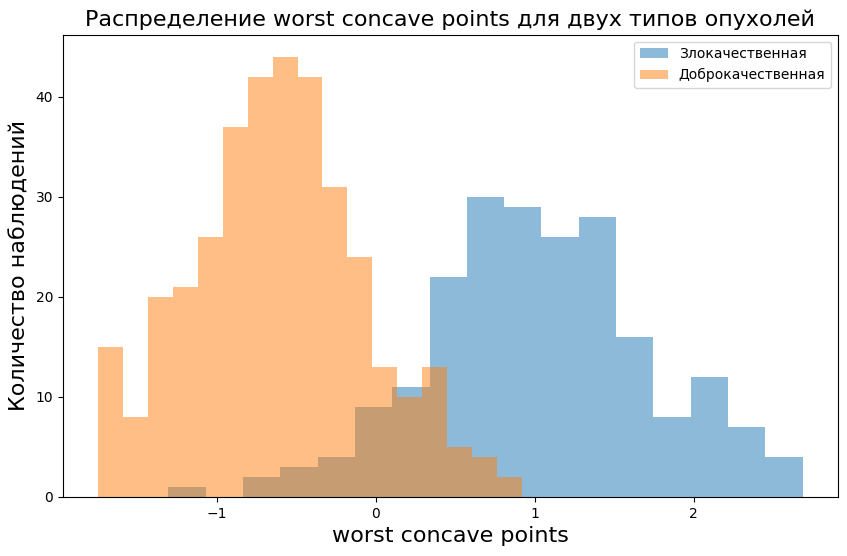

In [ ]:
# задаем количество интервалов
bins = 17

# и размер графика
plt.figure(figsize = (10,6))

# из датафрейма cancer_df_scaled выберем столбец 'worst concave points'
# и только те строки, где target == 0 (злокачественная)
plt.hist(cancer_df_scaled.loc[cancer_df_scaled['target'] == 0, 'worst concave points'], bins, alpha = 0.5, label = 'Злокачественная')

# то же самое, но target == 1 (доброкачественная)
plt.hist(cancer_df_scaled.loc[cancer_df_scaled['target'] == 1, 'worst concave points'], bins, alpha = 0.5, label = 'Доброкачественная')
plt.legend(loc = 'upper right')

# добавим подписи и размер шрифта
plt.xlabel('worst concave points', fontsize = 16)
plt.ylabel('Количество наблюдений', fontsize = 16)
plt.title('Распределение worst concave points для двух типов опухолей', fontsize = 16)

### Этап 4. Отбор и выделение признаков

Поместим наши признаки в переменную X, а классы в переменную y

In [ ]:
# для этого возьмем названия признаков из индекса нашего вспомогательного датафрейма data,
# преобразуем их в список и сделаем срез по первым 10 значениям
features = list(data.index[:10])
print(features)

['worst concave points', 'worst perimeter', 'mean concave points', 'worst radius', 'mean perimeter', 'worst area', 'mean radius', 'mean area', 'mean concavity', 'worst concavity']


In [ ]:
# теперь отфильтруем исходный датафрейм cancer_df_scaled по этим признакам
X = cancer_df_scaled[features]

# а в переменную y запишем классы
y = cancer_df_scaled['target']

### Этап 5. Обучение и оценка качества модели

Разделение на обучающую и тестовую выборки

In [ ]:
# импортируем необходимый модуль
from sklearn.model_selection import train_test_split

# размер тестовой выборки составит 30%
# также зададим точку отсчета для воспроизводимости результата
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)

Обучение модели и прогноз

In [ ]:
# импортируем логистическую регрессию из модуля linear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression

In [ ]:
# создадим объект этого класса и запишем его в переменную model
model = LogisticRegression()

# обучим нашу модель
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# выполним предсказание класса на тестовой выборке
y_pred = model.predict(X_test)

Оценка качества модели

In [ ]:
# построим матрицу ошибок
from sklearn.metrics import confusion_matrix

# передадим ей тестовые и прогнозные значения
# поменяем порядок так, чтобы злокачественные опухоли были положительным классом
model_matrix = confusion_matrix(y_test, y_pred, labels = [1,0])

# для удобства создадим датафрейм
model_matrix_df = pd.DataFrame(model_matrix)
model_matrix_df

,0,1
0,104,4
1,2,61


In [ ]:
# добавим подписи к столбцам и строкам через параметры columns и index
# столбец - это прогноз, строка - фактическое значение
# 0 - добр. образование, 1 - злок. образование (только в рамках матрицы ошибок!)
model_matrix_df = pd.DataFrame(model_matrix, columns = ['Прогноз добр.', 'Прогноз злок.'], index = ['Факт добр.', 'Факт злок.'])
model_matrix_df

,Прогноз добр.,Прогноз злок.
Факт добр.,104,4
Факт злок.,2,61


In [ ]:
# убедимся, что матрица верна
# посчитаем сколько было предсказанных значений (см. на столбцы)
# 0 и 1 как в исходном датафрейме!
unique, counts = np.unique(y_pred, return_counts = True)
unique, counts

(array([0, 1]), array([ 65, 106]))

In [ ]:
# посчитаем сколько было фактических значений (см. на строки)
unique, counts = np.unique(y_test, return_counts = True)
unique, counts

(array([0, 1]), array([ 63, 108]))

In [ ]:
# рассчитаем accuracy или долю правильных прогнозов
round((61 + 104)/(61 + 104 + 2 + 4), 2)

0.96

In [ ]:
# мы также можем воспользоваться встроенной в sklearn метрикой
from sklearn.metrics import accuracy_score

model_accuracy = accuracy_score(y_test, y_pred)
round(model_accuracy, 2)

0.96

### Упражнения

#### Подготовка и исследование данных

**Задание 1**. Вновь загрузите данные по опухолевым образованиям. Создайте датафрейм, добавьте целевую переменную, выведите *последние* пять строк датафрейма (для этого используйте функцию **.tail()**).

**Задание 2**. Проведите нормализацию данных и выведите первые пять значений нормализованного набора данных.

**Задание 3**. Графически оцените распределение переменной `worst perimeter` для двух типов опухолей.

#### Построение и оценка качества модели

**Задание 4**. Возьмите все признаки и поместитие их в переменную `X`, целевую переменную поместите в переменную `y`.

**Задание 5**. Разделите данные на обучающую и тестовую части.

**Задание 6**. Постройте модель логистической регрессии и сделайте прогноз.

**Задание 7**. Постройте матрицу ошибок, не забудьте про подписи к строкам и столбцам. Какие выводы можно сделать?

**Задание 8**. Оцените accuracy результата вручную и с помощью модуля metrics.